In [1]:
import babypandas as bpd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline

# Week 10: Regression

## Ice cream and shark attacks
---

Today we'll be looking at Ice Cream, Fudge, and Sharks!

In [2]:
tbl = bpd.read_csv("data/ice-cream-stats.csv")
tbl

,Ice Cream Sales (cones),Fudge Sale Volume (g),Shark Attacks
0,20,5090.230379,296.0
1,21,5835.929912,254.0
2,22,6015.842367,448.0
3,23,6074.030582,239.0
4,24,5876.716421,347.0
...,...,...,...
95,116,6391.581016,2186.0
96,117,7429.923774,2470.0
97,118,7496.537723,1872.0
98,119,8995.265802,2035.0


In [3]:
# Let's set some variables to the columns for easier reference
ice, fudge, shark = tbl.get("Ice Cream Sales (cones)"), tbl.get("Fudge Sale Volume (g)"), tbl.get("Shark Attacks") 

# First, let's cement some knowledge
---

Before we get into it, let's make sure we are clear on a few things related to distributions, confidence intervals, hypothesis testing, etc.

1. **Population**
   - Distribution
   - Population Parameters
     - Mean, SD, others
     
     
2. **Sample**
   - How to obtain (without replacement from pop)
   - Distribution
   - Sample Statistics
     - Mean, SD, others
     
     
3. **Distribution of Sample Statistics**
   - How to obtain (with replacement from sample, or mathematically)
   - Distribution
     - What is the statistic?
   - Features
     - Mean, SD

# Let's talk about relationships
---

Let's consider the following table:

|x|y|
|---|---|
|1|2|
|2|4|
|4|8|
|5|10|

If we were to receive an $x=3$, what would we expect the corresponding $y$ to equal? Why?

Does this expectation seem like a solid choice?

```
We expect that y=6.

We see a perfect linear relationship between x and y, where y = 2x.

This expectation seems very solid, as data on either side of x=3 exhibits this exact trend.
```

Now, let's consider what we expect the value of $y$ to equal when we receive an $x=6$.

Given x := 6, what do we expect y to equal?

Does this expectation seem like a solid choice?

```
While we'd like to say that y should equal 12, we're extrapolating beyond our data set, so this is risky!
```

What about the following graph of `Ice Cream Sales` versus `Fudge Sales Volume`?

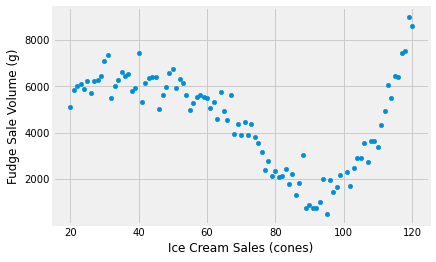

In [4]:
tbl.plot(kind = "scatter", x = "Ice Cream Sales (cones)", y = "Fudge Sale Volume (g)")

What, roughly, would we expect $Fudge\ Sales\ Volume$ to equal provided that $Ice\ Cream\ Sales = 100$?

```
When Ice Cream = 100, Fudge ≈ 2000.
```

Let's focus on our justification for coming up with a value for $Fudge$.  We saw a strong *relationship* between $Ice \ Cream$ and $Fudge$.  What does that mean?

If we're speaking statistically, then we consider `relationship == association`.  And an association really boils down to the following claim:  

<center>"When this changes value, then that changes value too."</center>

# Correlation
---

What does correlation (or the correlation coefficient) tell us?

```
How linear the relationship between x and y is.
```

Correlation can be positive or negative, and it can be perfect, strong, moderate, weak, or zero.  We can also quantify it using the correlation coefficient, $r$.

So, going back to our table of $x$ and $y$ above, what correlation do we see?  What about for $Ice\ Cream$ and $Fudge$?

In [5]:
# What is the correlation (qualitatively) between x and y?

```
x and y are perfectly positively correlated
```

In [6]:
# Ice Cream and Fudge are strongly associated.
# What is the correlation between Ice Cream and Fudge?  Is it a strong correlation?

```
No, the relationship between Ice Cream and Fudge is not linear, so there is not a strong correlation.
```

So, how do we go about measuring the correlation (finding the correlation coefficient)?

We must first put our x and y values into *"standard units"*.  Recall, to put a point into standard units, what formula is used?

In [7]:
# First, what does it mean (in words) for something a point to be `n` in standard units?

```
It means that point is n standard deviations away from the mean of the data set.
```

For some data set, $X$, let $x_i = some\ datapoint\ in\ X$

Then, $x_{i, SU} =$ ??


And, replacing $x_i$ with all of our datapoints, $X$, we can convert the entire data set into standard units.

$$\frac{x_i-mean_X}{SD_X}$$

In [8]:
# Before we convert Ice Cream and Fudge to SU, what do we know about what the scatter plot
# will look like after converting both?

```
The shape of the plot will remain the same.
```

In [9]:
# Let's write a quick standard units function
def standard_units(array):
    return (array - array.mean()) / np.std(array)

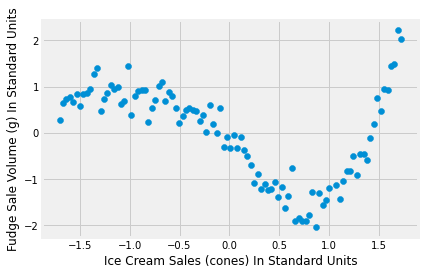

In [10]:
ice_su = standard_units(ice)
fudge_su = standard_units(fudge)

plt.scatter(ice_su, fudge_su)
plt.xlabel("Ice Cream Sales (cones) In Standard Units"); plt.ylabel("Fudge Sale Volume (g) In Standard Units");

In [11]:
# What changed between the two plots?

```
The units/scale of the axes changed.
```

Now, to find our correlation coefficient between two data sets, $X$ and $Y$, there is one more formula:

$$r = mean[X_{SU} * Y_{SU}]$$

In [12]:
# Calculate the correlation coefficient between a and b

r = (ice_su * fudge_su).mean()
r

-0.47097210099192216

Recalling what the correlation between two data sets tells us, what does this really mean?

In [13]:
# In words, what does our correlation coefficient mean?

```
There is a moderately-weak negative linear relationship between ice cream sales and fudge sales.
```

# Onwards, to regression!
---

So, we have a correlation coefficient now.  What can we do with it?

One idea is to plot it somehow.  But how?

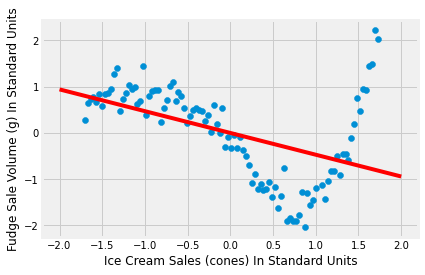

In [14]:
# Let's try incorporating the correlation coefficient into our plot

plt.scatter(ice_su, fudge_su)
plt.plot(np.linspace(-2, 2, 2), np.linspace(-2, 2, 2)*r, c='red')
plt.xlabel("Ice Cream Sales (cones) In Standard Units"); plt.ylabel("Fudge Sale Volume (g) In Standard Units");

In [15]:
# Now that we've incorporated r into our plot, what does r represent?

```
It represents the slope of the best-fit line.
```

And that's the premise of linear regression!

So, before we go much further, let's figure something out: *What is the purpose of regression?*

Well, it's very useful since it can help us **predict** a value when given an input.  Even if we don't have a data point we can still predict what the corresponding value would be.

We've been looking just at linear regression—stuff that falls in a line—but the same concepts carry over to higher powers!

How about we take a look at some data that's a bit more linear?  Take a look at the plot of $Ice\ Cream\ Sales$ vs $Shark\ Attacks$.

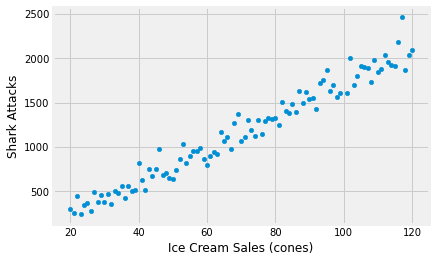

In [16]:
tbl.plot(kind = "scatter", x = "Ice Cream Sales (cones)", y = "Shark Attacks")

Okay, let's find the correlation coefficient so that we can plot a best fit line.

In [17]:
# Before calculating anything, what do you think the correlation coefficient should be?

```
Well, I thought that it was the slope of the best-fit line (about 2000 / 100).  But it can't be >1, so it can't be 20! 
```

In [18]:
# We can use the standard_units function we created
ice_su = standard_units(ice)
shark_su = standard_units(shark)

r = (ice_su * shark_su).mean()
r

0.9808527710561902

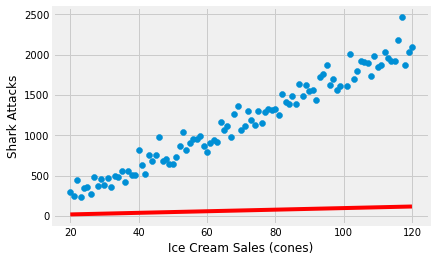

In [19]:
# Let's plot it!

xrange = np.linspace(ice.min(), ice.max(), 2)

plt.scatter(ice, shark)
plt.plot(xrange, xrange * r, c='r')
plt.xlabel("Ice Cream Sales (cones)"); plt.ylabel("Shark Attacks");

What's wrong with that plot?

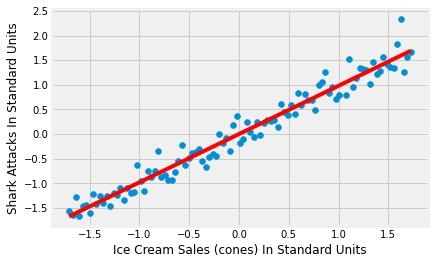

In [20]:
# Let's fix the plot

xrange = np.linspace(ice_su.min(), ice_su.max(), 2)
plt.scatter(ice_su, shark_su)
plt.plot(xrange, xrange * r, c='r')
plt.xlabel("Ice Cream Sales (cones) In Standard Units"); plt.ylabel("Shark Attacks In Standard Units"); 

In [21]:
# What is the equation of the line we plotted?

$$y = r * x$$

Now that we fixed that plot, we should be able to plug in values into our best-fit line now.  But I'm not really satisfied with the plot we ended up creating.

```
The line that we came up with is still in terms of standard units, so it's a bit too tedious to be useful!
```

Let's go ahead and solve that problem.

In order to come up with an equation for the best-fit line in original units (not standard units), what needs to be done?

Well, let's examine what we'd need to change.  For starters, the best-fit line in standard units passes through (0, 0).  Second of all, it has a different slope than what we'd expect.

In standard units, we have $y = rx$.  We want to put this back into original units as the form $y=mx+b$.

$$m = r\cdot \frac{SD_y}{SD_x}$$

$$b = mean_y - m\cdot mean_x$$

In [22]:
# Let's derive this


$$y_{SU} = r\cdot x_{SU}$$

$$\frac{y - mean_y}{SD_y} = r\cdot \frac{x-mean_x}{SD_x}$$

$$\hspace{2.85cm} y-mean_y = r\cdot \frac{1}{SD_x} \cdot (x-mean_x) \cdot SD_y$$

$$\hspace{1.6cm} y-mean_y = \frac{r\cdot SD_y}{SD_x} \cdot (x-mean_x)$$

$$\hspace{2.45cm} y-mean_y = \frac{r\cdot SD_y}{SD_x}x - \frac{r\cdot SD_y}{SD_x}mean_x$$

$$\hspace{6.2cm} y = \frac{r\cdot SD_y}{SD_x}x + (mean_y - \frac{r\cdot SD_y}{SD_x}mean_x)$$


Great, so let's get our line into original units.  Then, we can start predicting values!

In [23]:
# Write the euqation of the best-fit line between
# Ice Cream and Shark Attacks in original units.

slope = r * np.std(shark) / np.std(ice)
intercept = shark.mean() - slope * ice.mean()

"Shark Attacks = {} * Ice Cream Sales (cones) + {}".format(slope, intercept)

'Shark Attacks = 18.743829246182646 * Ice Cream Sales (cones) + -141.1248984589306'

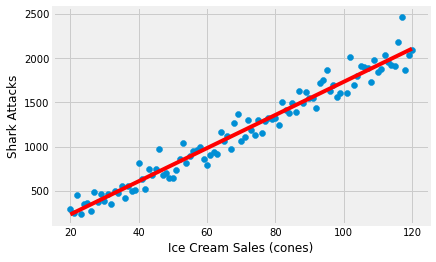

In [24]:
# And plot it out
xrange = np.linspace(ice.min(), ice.max(), 2)

plt.scatter(ice, shark)
plt.plot(xrange, slope * xrange + intercept, c='r')
plt.xlabel("Ice Cream Sales (cones)"); plt.ylabel("Shark Attacks");

In [25]:
# Alright, now, given an Ice Cream value of 100,
# what do we expect the corresponding y value to be?

value = slope * 100 + intercept
value

1733.258026159334

In [26]:
# What if Ice Cream has a value of 0?

value = slope * 0 + intercept
value

-141.1248984589306

```
It's impossible to have negative shark attacks!  Regression doesn't work perfectly on data outside of our data set!
```

In [27]:
slope, intercept

(18.743829246182646, -141.1248984589306)

In [28]:
# Interpret the best-fit line equation in words

# Ice Cream &Rightarrow; Shark Attacks?
---

Well, we've done it!  We've figured out that there's a very strong positive correlation between ice cream sales and shark attacks.  Does this mean that ice cream sales cause increased shark attacks?

In [29]:
# Does the strong correlation imply that Ice Cream Sales causes increase shark attacks?

```
No!  **Correlation does not imply causation**
```

# Bootstrapping For Regression

We use bootstrapping in regression for two reasons:
1. To determine if a correlation is significant
2. To determine what range of values could be predicted given an input

## 1. Determine if a Correlation is Significant

In [30]:
# Ice Cream vs Fudge
correlations = np.array([])
for i in range(10_000):
    if i % 500 == 0: print(i, end = ", ")
    indeces = np.random.choice(np.arange(len(ice)), size=len(ice))

    bootstrap_ice_su = standard_units(ice.iloc[indeces])
    bootstrap_fudge_su = standard_units(fudge.iloc[indeces])
    
    correlations = np.append(correlations, (bootstrap_ice_su * bootstrap_fudge_su).mean())

0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 

95% confidence interval for the Correlation between Ice Cream Sales and Fudge Sales

In [31]:
np.percentile(correlations, 2.5), np.percentile(correlations, 97.5)

(-0.6805804980383453, -0.26478899711735665)

In [32]:
# Ice Cream vs Shark Attacks
correlations = np.array([])
for i in range(10000):
    if i % 500 == 0: print(i, end = ", ")
    indeces = np.random.choice(len(ice), len(ice))
    
    bootstrap_ice_su = standard_units(ice.iloc[indeces])
    bootstrap_shark_su = standard_units(shark.iloc[indeces])
    
    correlations = np.append(correlations, (bootstrap_ice_su * bootstrap_shark_su).mean())

0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 

95% confidence interval for the Correlation between Ice Cream Sales and Shark Attacks

In [33]:
np.percentile(correlations, 2.5), np.percentile(correlations, 97.5)

(0.9739978973974087, 0.9869650006530405)

## 2. Determine the range of predictions for an input

In [34]:
preds = np.array([])
for i in range(1000):
    indeces = np.random.choice(len(ice), len(ice))

    bootstrap_ice_su = standard_units(ice.iloc[indexes])
    bootstrap_shark_su = standard_units(shark.iloc[indexes])
    
    r = (bootstrap_ice_su * bootstrap_shark_su).mean()
    slope = r * np.std(shark.iloc[indeces]) / np.std(ice.iloc[indeces])
    intercept = shark.iloc[indeces].mean() - slope * (ice.iloc[indeces]).mean()

    preds = np.append(preds, slope * 100 + intercept)

NameError: name 'indexes' is not defined

In [ ]:
np.percentile(preds, 2.5), np.percentile(preds, 97.5)

# Bonus!
---
In addition to the correlation coefficient, $r$, there is also a *"coefficient of determination"*, $r^2$, which is defined as:
> The proportion of the variance in the dependent variable that explained by the best-fit line.

Let's interpret it in terms of Ice Cream Sales and Shark Attacks!

In [ ]:
# Interpret (in words) the coefficient of determination

r2 = r**2
r2

```
The best-fit line with shark attacks explains 96% of the variation in the number of Shark Attacks.
```